In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/tree_height_road_distances_analysis.csv')

In [13]:
df.columns

Index(['fid', 'id', 'left', 'top', 'right', 'bottom', 'row_index', 'col_index',
       'tree_height_mean', 'tree_height_min', 'tree_height_max',
       'biketrail_distance_mean', 'biketrail_distance_max', 'carroad_mean',
       'carroad_max', 'horse_mean', 'horse_max', 'hiking_distance_mean',
       'hiking_distance_max'],
      dtype='object')

In [23]:
import pandas as pd

# Assuming `df` is already loaded

# Select only columns that end with '_mean'
mean_cols = [col for col in df.columns if col.endswith('_mean')]
mean_df = df[mean_cols]

# Calculate the correlation matrix
correlation_matrix = mean_df.corr()

# Print it nicely
print(correlation_matrix)


                         tree_height_mean  biketrail_distance_mean  \
tree_height_mean                 1.000000                -0.103636   
biketrail_distance_mean         -0.103636                 1.000000   
carroad_mean                    -0.071468                 0.102212   
horse_mean                       0.112969                -0.022280   
hiking_distance_mean            -0.066692                 0.066159   

                         carroad_mean  horse_mean  hiking_distance_mean  
tree_height_mean            -0.071468    0.112969             -0.066692  
biketrail_distance_mean      0.102212   -0.022280              0.066159  
carroad_mean                 1.000000    0.137876              0.022485  
horse_mean                   0.137876    1.000000              0.052266  
hiking_distance_mean         0.022485    0.052266              1.000000  


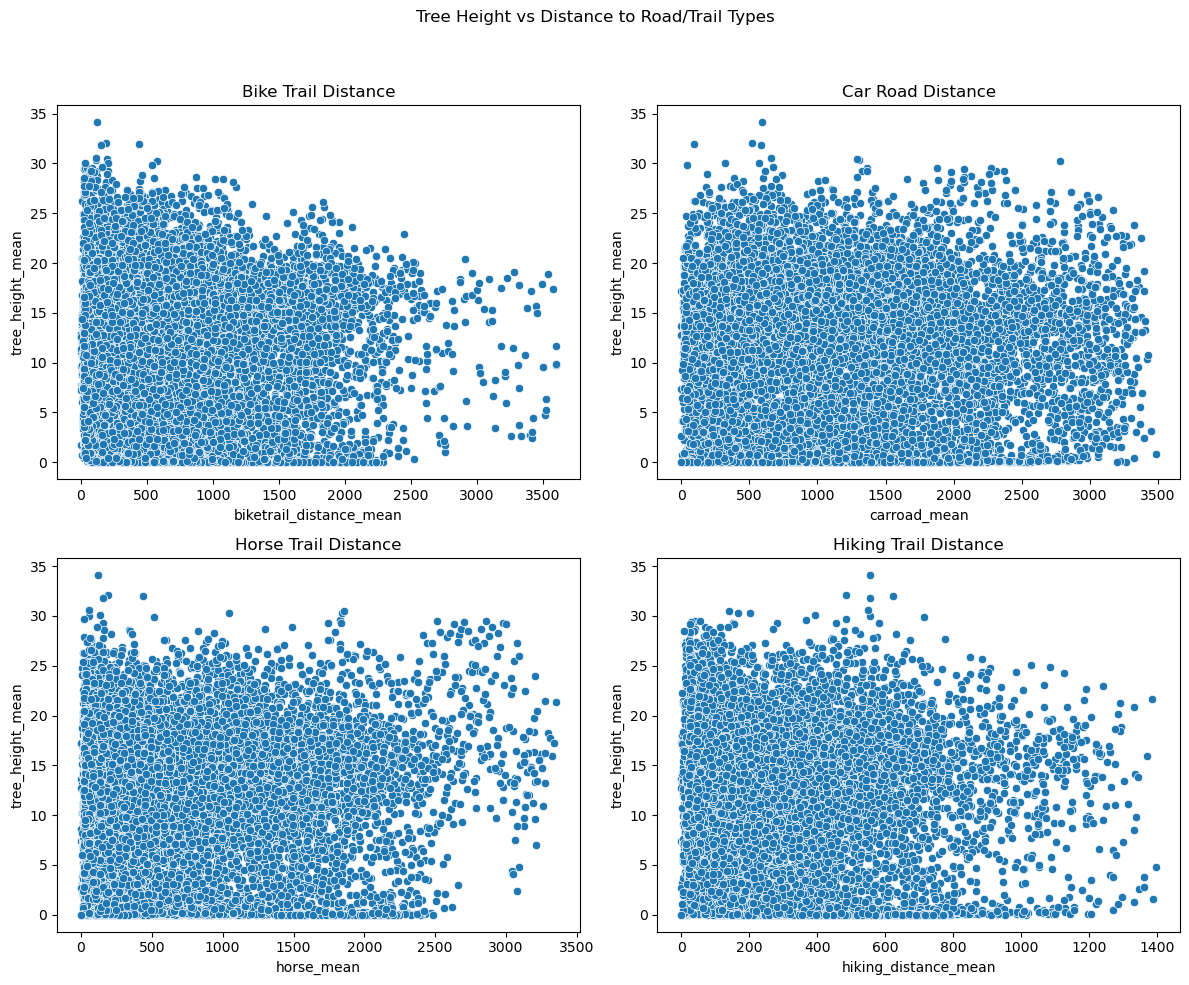

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define plot layout
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Tree Height vs Distance to Road/Trail Types')

# Plot 1: Biketrail
sns.scatterplot(x='biketrail_distance_mean', y='tree_height_mean', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Bike Trail Distance')

# Plot 2: Car Road
sns.scatterplot(x='carroad_mean', y='tree_height_mean', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Car Road Distance')

# Plot 3: Horse Trail
sns.scatterplot(x='horse_mean', y='tree_height_mean', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Horse Trail Distance')

# Plot 4: Hiking Trail
sns.scatterplot(x='hiking_distance_mean', y='tree_height_mean', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Hiking Trail Distance')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [29]:
# Define relevant columns
cols_for_corr = [
    'tree_height_mean',
    'tree_height_max',
    'biketrail_distance_mean',
    'carroad_mean',
    'horse_mean',
    'hiking_distance_mean'
]

# Compute Spearman correlation
spearman_corr = df_corr.corr(method='spearman')

# Display result
print(spearman_corr)


                         tree_height_mean  tree_height_max  \
tree_height_mean                 1.000000         0.633001   
tree_height_max                  0.633001         1.000000   
biketrail_distance_mean         -0.106995        -0.128086   
carroad_mean                    -0.082914         0.110067   
horse_mean                       0.105489         0.120529   
hiking_distance_mean            -0.074740        -0.080885   

                         biketrail_distance_mean  carroad_mean  horse_mean  \
tree_height_mean                       -0.106995     -0.082914    0.105489   
tree_height_max                        -0.128086      0.110067    0.120529   
biketrail_distance_mean                 1.000000      0.098662   -0.052925   
carroad_mean                            0.098662      1.000000    0.128053   
horse_mean                             -0.052925      0.128053    1.000000   
hiking_distance_mean                    0.050582      0.039181    0.034211   

                  

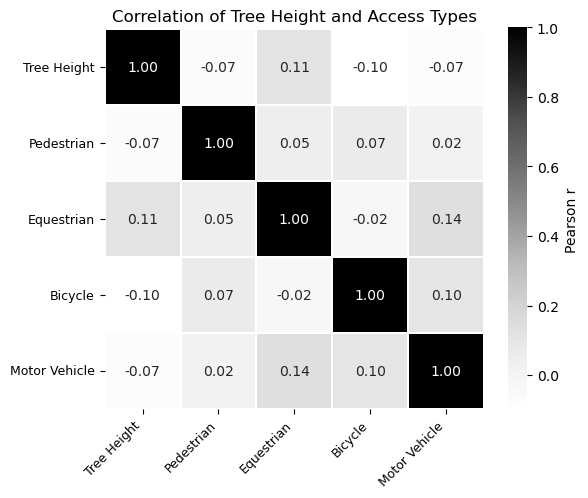

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ðŸ”¹ Define and rename relevant columns
cols_for_corr = {
    'tree_height_mean': 'Tree Height',
    'hiking_distance_mean': 'Pedestrian',
    'horse_mean': 'Equestrian',
    'biketrail_distance_mean': 'Bicycle',
    'carroad_mean': 'Motor Vehicle'
}

# ðŸ”¹ Filter DataFrame and drop missing values
df_corr = df[list(cols_for_corr.keys())].dropna()

# ðŸ”¹ Rename columns for the heatmap
df_corr = df_corr.rename(columns=cols_for_corr)

# ðŸ”¹ Calculate correlation matrix
corr_matrix = df_corr.corr()

# ðŸ”¹ Plot heatmap
plt.figure(figsize=(6, 5))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="Greys",
    fmt=".2f",
    square=True,
    linewidths=.3,
    cbar_kws={'label': 'Pearson r'}
)

plt.title("Correlation of Tree Height and Access Types", fontsize=12)

# ðŸ”„ Diagonal x-axis labels to save vertical space
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

plt.tight_layout()

# ðŸ”¹ Save to file
plt.savefig("tree_height_distance_correlation_greyscale.png", dpi=300, bbox_inches='tight')

# ðŸ”¹ Show plot
plt.show()
